In [2]:
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
df = pd.read_parquet("./data/parquets/2022-10.parquet")
df.head()

,station_id,num_bikes_available,num_bikes_available_types,num_bikes_disabled,num_docks_available,num_docks_disabled,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,datetime,time_since_prev_report,available_bikes_delta
0,2,15,"{'mechanical': 15, 'ebike': 0}",5,0,0,2022-09-30 23:58:13,False,IN_SERVICE,True,True,True,None,2022-10-01 00:02:00,NaN,NaN
0,2,14,"{'mechanical': 14, 'ebike': 0}",5,1,0,2022-10-01 00:02:34,False,IN_SERVICE,True,True,True,None,2022-10-01 00:06:00,261.0,-1.0
0,2,14,"{'mechanical': 14, 'ebike': 0}",5,1,0,2022-10-01 00:06:53,False,IN_SERVICE,True,True,True,None,2022-10-01 00:10:00,259.0,0.0
0,2,14,"{'mechanical': 14, 'ebike': 0}",5,1,0,2022-10-01 00:11:14,False,IN_SERVICE,True,True,True,None,2022-10-01 00:11:00,261.0,0.0
0,2,14,"{'mechanical': 14, 'ebike': 0}",5,1,0,2022-10-01 00:15:34,False,IN_SERVICE,True,True,True,None,2022-10-01 00:17:00,260.0,0.0


In [6]:
df['ds'] = pd.to_datetime(df['last_reported'])
df['y'] = pd.to_datetime(df['num_bikes_available'])

# Base prophet model

In [11]:
m = Prophet()
m.fit(df.loc[df.station_id == 117][["ds", "y"]])

16:00:42 - cmdstanpy - INFO - Chain [1] start processing
16:00:43 - cmdstanpy - INFO - Chain [1] done processing


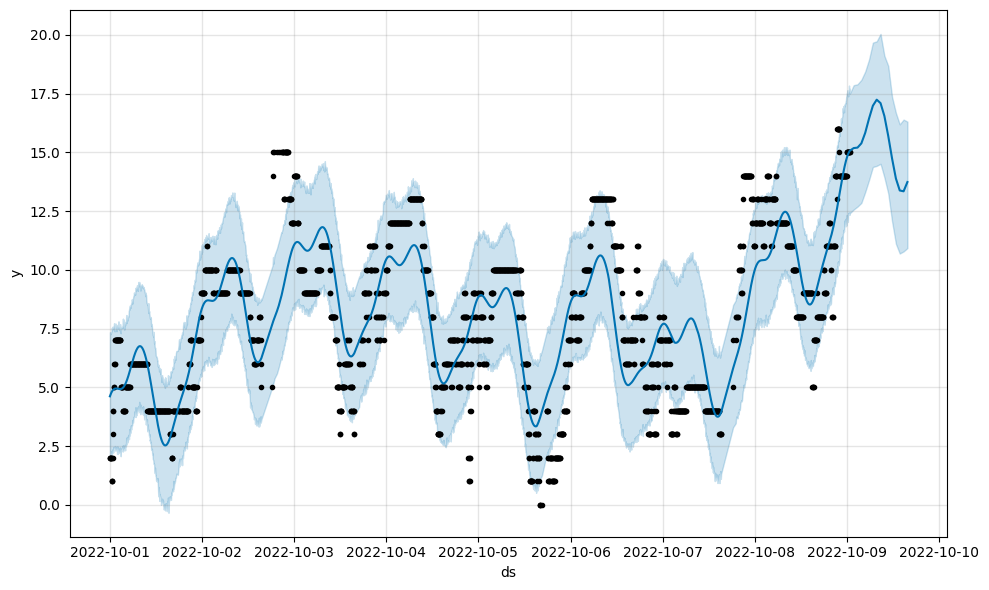

In [23]:
future = m.make_future_dataframe(periods=15, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

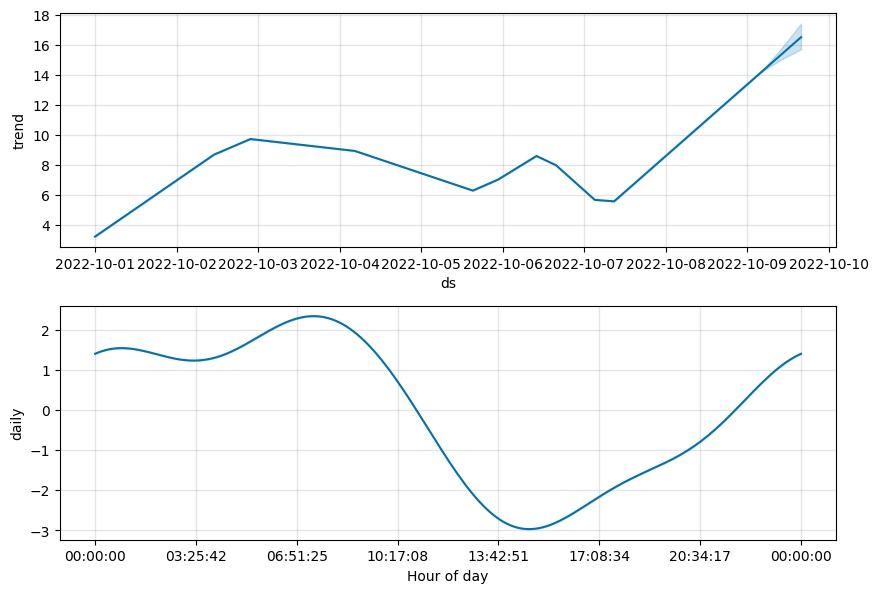

In [15]:
fig = m.plot_components(fcst);